In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import pandas as pd
from matplotlib.pyplot import figure

In [30]:
def areaavgTS(areafile,var,timelength):
    """ 
    Var needs to be 3D
    time length = num timesteps
    """
    # area is 96x144
    ads = xr.open_dataset(areafile)
    area = ads['AREA']
    area3D = np.tile(area,(timelength,1,1))
    vararea = var*area3D
    sumVarArea = np.sum(vararea,axis=(1,2))
    sumArea = np.sum(area,axis=(0,1))
    #print(sumVarArea.shape)
    # error occurs here
    #print(sumArea)
    output_core_dims=[["time"]]
    ar_avgd = sumVarArea/float(sumArea)
    return ar_avgd

In [32]:
mask = "/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.project_preindustrial.new.cam.LANDFRAC.OCNFRAC.0001-0010.nc"
CH4 = "/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.ch4_perturbation.cam.h0.000101-000912.nc"
PI = "/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.project_preindustrial.cam.h0.0001-0010.nc"
areafile = '/glade/work/smagahey/GEOG8130/data/project_results/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr1850_c190304.nc'



In [6]:
dsmask = xr.open_dataset(mask)
dsCH4 = xr.open_dataset(CH4)
dsPI = xr.open_dataset(PI)


In [7]:
T_PI = dsPI["TREFHT"]
T_CH4 = dsCH4["TREFHT"]
lnd = dsmask["LANDFRAC"] # 1 = where land is
ocn = dsmask["OCNFRAC"] # 1 = where ocn is.

In [18]:
PI_lnd = np.multiply(T_PI,lnd)
PI_ocn = np.multiply(T_PI,ocn)
CH4_lnd = np.multiply(T_CH4,lnd)
CH4_ocn = np.multiply(T_CH4,ocn)

In [26]:
PI_lnd[0]=np.nan
PI_ocn[0]=np.nan
CH4_lnd[0]=np.nan
CH4_ocn[0]=np.nan
#replace zero with np.nan

In [28]:
PI_lnd.shape

(115, 96, 144)

In [33]:
av_PI_lnd = areaavgTS(areafile,PI_lnd,115)
av_PI_ocn = areaavgTS(areafile,PI_ocn,115)
av_CH4_lnd = areaavgTS(areafile,CH4_lnd,108)
av_CH4_ocn = areaavgTS(areafile,CH4_ocn,108)

In [37]:
landchange = pd.Series(av_CH4_lnd - av_PI_lnd)
ocnchange = pd.Series(av_CH4_ocn - av_PI_ocn)

In [38]:
LC = pd.Series(landchange.rolling(12).mean())
OC = pd.Series(ocnchange.rolling(12).mean())

In [16]:
lat = np.linspace(-90,90,96)
lon = np.linspace(0,360,144)

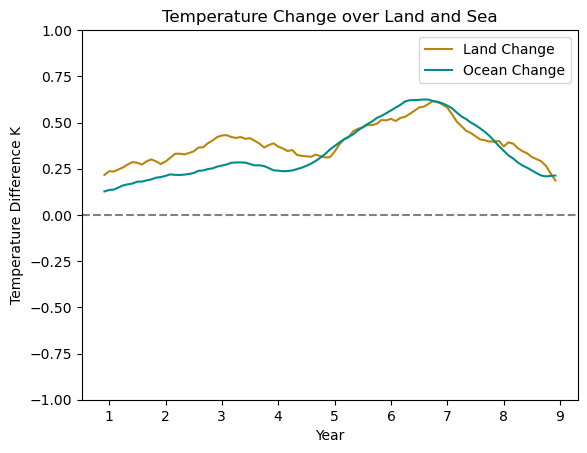

In [44]:
ticks=([12,24,36,48,60,72,84,96,108])
labels=(["1","2","3","4","5","6","7","8","9"])

fig1=plt.figure()
plt.plot(LC,"darkgoldenrod")
plt.plot(OC,"darkcyan")
plt.title("Temperature Change over Land and Sea")
plt.xlabel("Year")
plt.ylabel("Temperature Difference K")
plt.ylim(-1,1)
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend(["Land Change","Ocean Change"])
plt.xticks(ticks,labels)
plt.savefig("land_sea_temp.png")
